## learning-AI101 : perch regression (linear, polynormial regression)
- 혼자 공부하는 머신러닝과 딥러닝 : 130p ~ 149p
- 2024.07.13.
-----

## linear regression vs polynormial regression

- linear regression은 오차가 최소가 되는 weight와 bias를 찾는 과정 (각 perceptron의 기울기와 절편을 찾는 것과 같다고 생각)
- linear regression을 통하여 데이터의 단순한 추세를 파악할 수 있음 
- polynormial regression을 통하여 조금 더 구체적인 예측이 가능함 (model parameter의 수가 늘어났기 때문에)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [7]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

print (len(perch_length) == len(perch_weight))

True


In [10]:
# fit, modelling... -> 이상한 값 발견 -> length가 50에 1500kg인 perch를 1033.333333333kg 예측함

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split (perch_length, perch_weight)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)

knr.predict([[50]])

array([1033.33333333])

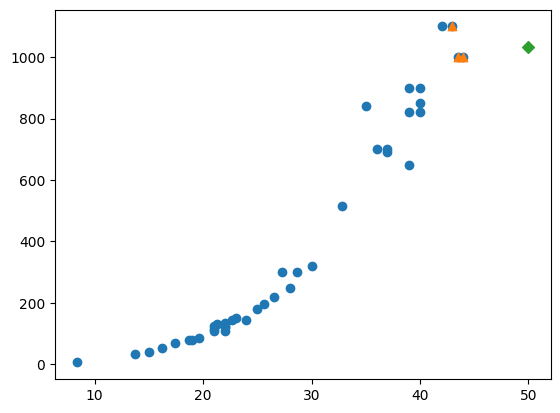

In [12]:
# 시각화를 통해 왜 그런지 확인

import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]]) 

plt.scatter (X_train, y_train)
plt.scatter (X_train[indexes], y_train[indexes], marker='^')
plt.scatter (50, 1033.33333, marker='D')

plt.show()

# 많이 동떨어져있는 값이기 때문에 그런듯 -> 따라서 선형 회귀 도입

In [13]:
# 선형 회귀 모델링 

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
# 선형 회귀 모델 학습 및 기울기, 

lr.fit (X_train, y_train)
print ("기울기와 절편 (가중치와 편향) : ", lr.coef_, lr.intercept_)

기울기와 절편 (가중치와 편향) :  [36.16644204] -619.1143754269285


In [17]:
# score

print ("test score : ", lr.score(X_test, y_test))
print ("train score : ", lr.score(X_train, y_train))

# test가 train보다 높다 -> 전체적으로 underfitting

test score :  0.9190479115115529
train score :  0.9178197758801087


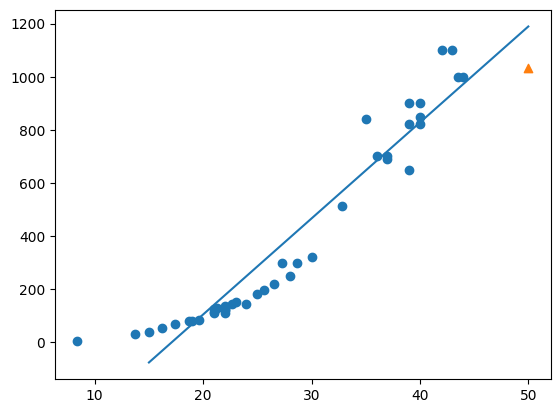

In [20]:
# 시각화

plt.scatter(X_train, y_train)
plt.plot([15, 50], [lr.coef_*i + lr.intercept_ for i in [15, 50]])
plt.scatter(50, 1033, marker='^')
plt.show()

# 아래와 같은 그래프가 생기는데, 어떻게 weight가 음수가 나올 수 있을까?
# 따라서 model parameter를 더 추가하여 정확도를 높이기 (곡선 형태)

In [22]:
# 이차식 형태의 polynormial regression
# 예측값 = w1 * x**2 + w2 * x**1 + w3 (w1, w2, w3을 찾는 과정)

# 이를 만들기 위해 열을 하나 더 추가 (제곱열)

X_train = np.column_stack((X_train**2, X_train))
X_test = np.column_stack((X_test**2, X_test))

In [24]:
# 다음은 선형회귀랑 같은 방식

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict([[50**2, 50]]) # 아까보다 더욱 정확히 예측함

array([1550.17537809])

[  0.99755742 -21.20950314] 116.75699054740682


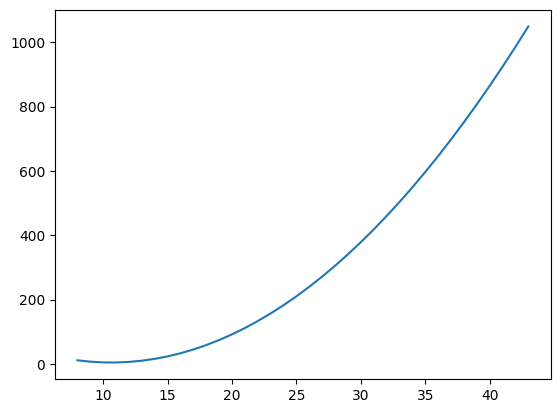

In [36]:
# 시각화

print (lr.coef_, lr.intercept_)

plt.plot([i for i in range (int(min(perch_length)), int(max(perch_length)))], 
        [lr.coef_[0]*i**2 + i*lr.coef_[1] + lr.intercept_ for i in range (int(min(perch_length)), int(max(perch_length)))])

plt.show()